In [10]:

import numpy as np
import matplotlib.pyplot as plt

#                ->   [x1,    x2]
individuo = np.array([[1, 2],       
                      [2, 3],      
                      [4, 5],      
                      [6, 7], 
                      [8, 9],
                              ])

clases = np.array([1, 1, 2, 2,3])

# pesos    se pueden cambiar
w =np.array( [[7, 3, 1], # pesos para x1
              [1, 9, 1], # pesos para x2
                        ])
# Parámetro de aprendizaje
pa = 0.2

# Número de épocas
num_epocas = 5

# Tamaño de la matriz de pesos
num_neuronas = w.shape[1]  # 5 neuronas
longitud = num_neuronas - 1  # 4 (índice máximo)

for epoca in range(num_epocas):
    print(f"\n--- Época {epoca + 1} ---")
    
    for i in range(len(individuo)):
        print(f"\nProcesando individuo {i}: {individuo[i]}  clase {i}: {clases[i]}"  )
        
        # 1. Calcular distancias euclidianas entre el individuo y todas las neuronas
        distancias = []
        for j in range(num_neuronas):
            dx = w[0, j] - individuo[i, 0]
            dy = w[1, j] - individuo[i, 1]
            D = dx**2 + dy**2  # Distancia euclidiana al cuadrado
            distancias.append(D)
        
        print("Distancias calculadas:", distancias)
        
        # 2. Encontrar la neurona ganadora (menor distancia)
        indice_min = np.argmin(distancias)
        valor_min = distancias[indice_min]
        print(f"Neurona ganadora: índice {indice_min}, distancia {valor_min:.4f}")
        
        # 3. Comparamos si el valor minimo es igual a la clase en curso
        if valor_min == clases[i]:
            print("La neurona ganadora CORRESPONDE a la clase del dato")
            # Actualización positiva (acercar pesos al dato)
            if indice_min == 0:
                print("Caso: neurona ganadora es la primera (índice 0)")
                for k in [0, 1]:
                    w[0, k] += pa * (individuo[i, 0] - w[0, k])
                    w[1, k] += pa * (individuo[i, 1] - w[1, k])
                    
            elif indice_min == longitud:
                print(f"Caso: neurona ganadora es la última (índice {longitud})")
                for k in [longitud, longitud-1]:
                    w[0, k] += pa * (individuo[i, 0] - w[0, k])
                    w[1, k] += pa * (individuo[i, 1] - w[1, k])
                    
            else:
                print(f"Caso: neurona ganadora es intermedia (índice {indice_min})")
                for k in [indice_min-1, indice_min, indice_min+1]:
                    w[0, k] += pa * (individuo[i, 0] - w[0, k])
                    w[1, k] += pa * (individuo[i, 1] - w[1, k])
        else:
            print("La neurona ganadora NO CORRESPONDE a la clase del dato")
            # Actualización negativa (alejar pesos del dato)
            if indice_min == 0:
                print("Caso: neurona ganadora es la primera (índice 0)")
                for k in [0, 1]:
                    w[0, k] -= pa * (individuo[i, 0] - w[0, k])
                    w[1, k] -= pa * (individuo[i, 1] - w[1, k])
                    
            elif indice_min == longitud:
                print(f"Caso: neurona ganadora es la última (índice {longitud})")
                for k in [longitud, longitud-1]:
                    w[0, k] -= pa * (individuo[i, 0] - w[0, k])
                    w[1, k] -= pa * (individuo[i, 1] - w[1, k])
                    
            else:
                print(f"Caso: neurona ganadora es intermedia (índice {indice_min})")
                for k in [indice_min-1, indice_min, indice_min+1]:
                    w[0, k] -= pa * (individuo[i, 0] - w[0, k])
                    w[1, k] -= pa * (individuo[i, 1] - w[1, k])
        
        print("Pesos actualizados:")
        print(w)

print("\n--- Pesos finales ---")
print(w)


--- Época 1 ---

Procesando individuo 0: [1 2]  clase 0: 1
Distancias calculadas: [37, 53, 1]
Neurona ganadora: índice 2, distancia 1.0000
La neurona ganadora CORRESPONDE a la clase del dato
Caso: neurona ganadora es la última (índice 2)
Pesos actualizados:
[[7 2 1]
 [1 7 1]]

Procesando individuo 1: [2 3]  clase 1: 1
Distancias calculadas: [29, 16, 5]
Neurona ganadora: índice 2, distancia 5.0000
La neurona ganadora NO CORRESPONDE a la clase del dato
Caso: neurona ganadora es la última (índice 2)
Pesos actualizados:
[[7 2 0]
 [1 7 0]]

Procesando individuo 2: [4 5]  clase 2: 2
Distancias calculadas: [25, 8, 41]
Neurona ganadora: índice 1, distancia 8.0000
La neurona ganadora NO CORRESPONDE a la clase del dato
Caso: neurona ganadora es intermedia (índice 1)
Pesos actualizados:
[[ 7  1  0]
 [ 0  7 -1]]

Procesando individuo 3: [6 7]  clase 3: 2
Distancias calculadas: [50, 25, 100]
Neurona ganadora: índice 1, distancia 25.0000
La neurona ganadora NO CORRESPONDE a la clase del dato
Caso: 

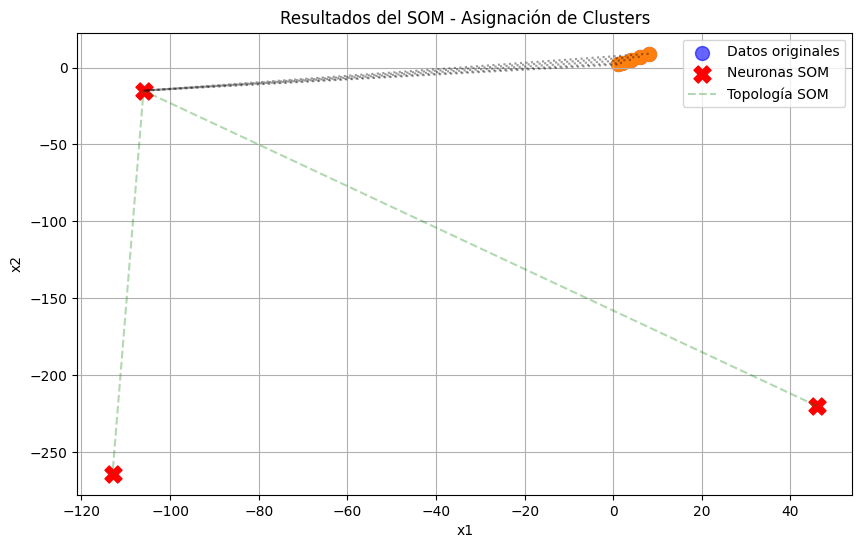

In [11]:
# Código adicional para visualización
plt.figure(figsize=(10, 6))

# Graficar los datos originales
plt.scatter(individuo[:, 0], individuo[:, 1], c='blue', label='Datos originales', s=100, alpha=0.6)

# Graficar los pesos finales de las neuronas
plt.scatter(w[0, :], w[1, :], c='red', marker='X', label='Neuronas SOM', s=150)

# Conectar las neuronas para mostrar la topología
plt.plot(w[0, :], w[1, :], 'g--', alpha=0.3, label='Topología SOM')

# Asignar cada punto a su neurona ganadora y colorear
for i in range(len(individuo)):
    distancias = [np.linalg.norm(individuo[i] - w[:, j]) for j in range(num_neuronas)]
    neurona_ganadora = np.argmin(distancias)
    plt.plot([individuo[i, 0], w[0, neurona_ganadora]], 
             [individuo[i, 1], w[1, neurona_ganadora]], 
             'k:', alpha=0.4)
    
    # Colorear según la neurona ganadora
    plt.scatter(individuo[i, 0], individuo[i, 1], c=f'C{neurona_ganadora}', s=100)

plt.title('Resultados del SOM - Asignación de Clusters')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()